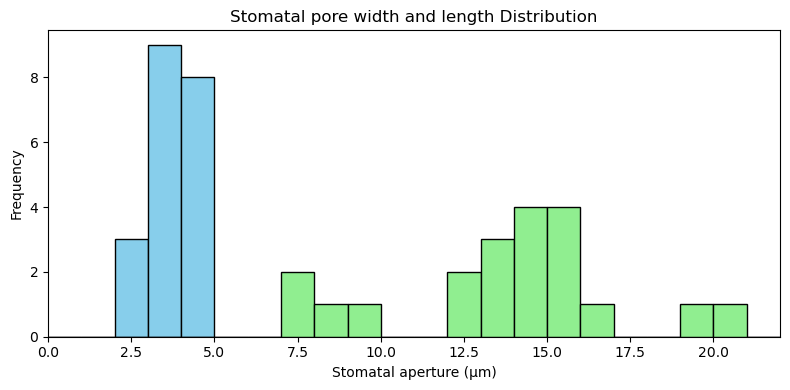

Mean width: 3.89 ± 0.10 µm
Mean length: 13.58 ± 1.50 µm


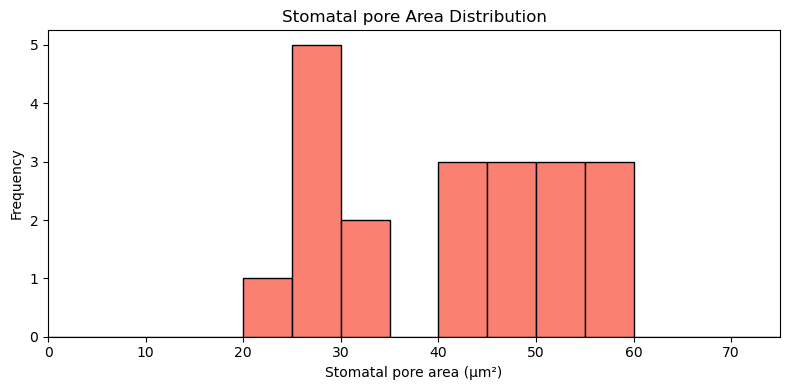

Mean area: 40.88 ± 4.72 µm²


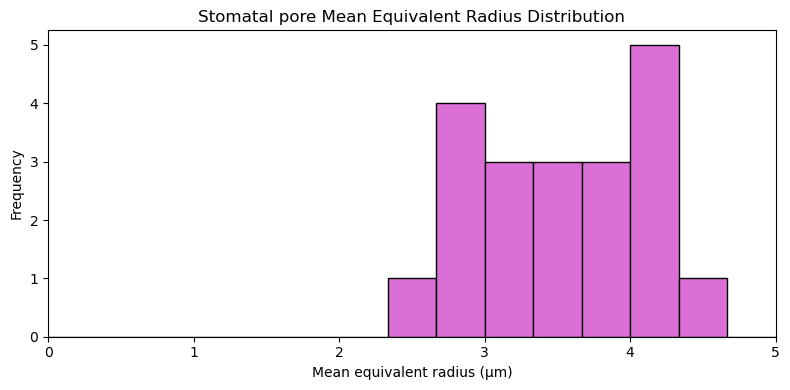

Mean equivalent radius: 3.56 ± 0.21 µm


In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

# We find stomatal aperture data from Devi & Reddy (2018). 
# The opening is rather elliptic, but we normalize area to a circle for simplicity.
# We also concatinate measurements from low and high VPD conditions 

widths = np.array([3.93, 3.33, 3.72, 3.87, 3.77, 4.69, 3.95, 4.82, 4.97, 4.86, 4.56, 3.43, 4.32, 3.68, 4.80, 3.01, 2.89, 2.41, 2.03, 4.66]) # µm
widths_err = 0.10 # µm (roughly)

lengths = np.array([13.2, 15.9, 20.5, 16.2, 19.8, 7.1, 8.18, 12.7, 13.3, 15.1, 7.09, 12.1, 14.1, 14.6, 13.5, 9.00, 14.3, 15.0, 15.7, 14.3])
lengths_err = 1.50 # µm (roughly)

# plot histogram of distributions
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(widths, bins=22, range=(0, 22), color='skyblue', edgecolor='black', label='width')
ax.hist(lengths, bins=22, range=(0,22), color='lightgreen', edgecolor='black', label='length')
ax.set_xlim(0,22)
ax.set_xlabel('Stomatal aperture (µm)')
ax.set_ylabel('Frequency')
ax.set_title('Stomatal pore width and length Distribution')
plt.tight_layout()
plt.show()

print(f'Mean width: {np.mean(widths):.2f} ± {widths_err:.2f} µm')
print(f'Mean length: {np.mean(lengths):.2f} ± {lengths_err:.2f} µm')

area = np.pi / 4 * widths * lengths  # µm² 
area_err = area * np.sqrt((widths_err / widths)**2 + (lengths_err / lengths)**2)

# plot histogram of area distribution
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(area, bins=15, range=(0, 75), color='salmon', edgecolor='black', label='area')
ax.set_xlim(0,75)
ax.set_xlabel('Stomatal pore area (µm²)')
ax.set_ylabel('Frequency')
ax.set_title('Stomatal pore Area Distribution')
plt.tight_layout()
plt.show()

print(f'Mean area: {np.mean(area):.2f} ± {np.mean(area_err):.2f} µm²')

# calculate the radius of a circle with equivalent area and bootstrap the error
r_eq = np.sqrt(area / np.pi)  # µm
r_eq_err = 0.5 * r_eq * area_err / area  # µm

# plot histogram of equivalent radius distribution
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(r_eq, bins=15, range=(0, 5), color='orchid', edgecolor='black', label='equivalent radius')
ax.set_xlim(0,5)
ax.set_xlabel('Mean equivalent radius (µm)')
ax.set_ylabel('Frequency')
ax.set_title('Stomatal pore Mean Equivalent Radius Distribution')
plt.tight_layout()
plt.show()

print(f'Mean equivalent radius: {np.mean(r_eq):.2f} ± {np.mean(r_eq_err):.2f} µm')



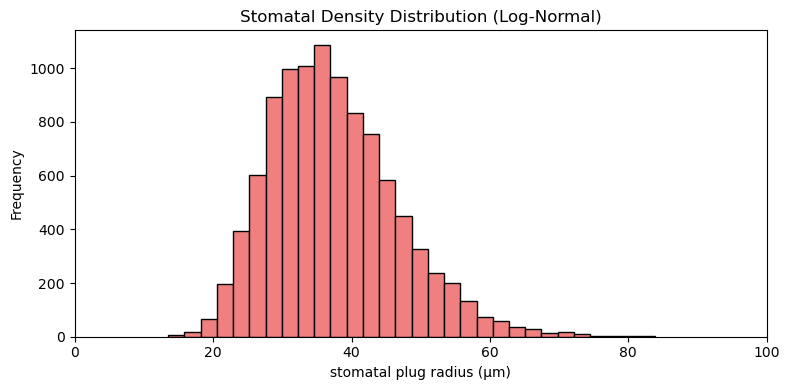

spacing distribution parameters (min, mean, max): 13.51, 37.44, 83.86
spacing derived parameters (min, mean, max): 19.88, 36.32, 167.32


In [2]:
# Next we dive into stomatal spacing with data from (Liu et al., 2018)
# The stomatal density is given in #/mm²
# for uniformly distributed stomata, the distance between stomata can be approximated as: 1/√d 
#     where for random distributions, a correction factor of 1/2 is applied

density_min = 8.93 # #/mm²
density_mean = 189.56  
density_max = 632.44 

log_norm_fwhm = 0.5 
log_norm_std = log_norm_fwhm / (2 * np.sqrt(2 * np.log(2)))  # convert FWHM to std
log_norm_mean = np.log10(density_mean)


n = 10_000
# draw n samples from a normal distribution with log_norm_mean and log_norm_std
log_samples = np.random.normal(log_norm_mean, log_norm_std, n)
# exponentiate to get log-normal samples
density_samples = 10**log_samples  # #/mm²
# derive spacing samples in µm
spacing_samples = 1e3 / np.sqrt(density_samples)/2  # µm


# plot a histogram of the density samples
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(spacing_samples, bins=30, color='lightcoral', edgecolor='black')
ax.set_xlabel('stomatal plug radius (µm)')
ax.set_xlim(0, 100)
ax.set_ylabel('Frequency')
ax.set_title('Stomatal Density Distribution (Log-Normal)')
plt.tight_layout()
plt.show()

print(f"spacing distribution parameters (min, mean, max): {np.min(spacing_samples):.2f}, {np.mean(spacing_samples):.2f}, {np.max(spacing_samples):.2f}")
print(f"spacing derived parameters (min, mean, max): {1e3/np.sqrt(density_max)/2:.2f}, {1e3/np.sqrt(density_mean)/2:.2f}, {1e3/np.sqrt(density_min)/2:.2f}")

In [12]:
# adding these and mesophyll thickness data to constants.py, we end up with the pairs:

%cd /home/andreasstillits/coding/Leaves1D/PNAS_REVIEW
from review.utils.constants import ThreeDimExploration 

constants = ThreeDimExploration()
print(f"Minimum: aspect={constants.aspect_min:.3f}, stomatal_radius={constants.stomatal_radius_min:.3f}")
print(f"Mean:    aspect={constants.aspect_mean:.3f}, stomatal_radius={constants.stomatal_radius_mean:.3f}")
print(f"Maximum: aspect={constants.aspect_max:.3f}, stomatal_radius={constants.stomatal_radius_max:.3f}")

print("Ratios of stomatal_radius to aspect:")
print(f"min : {constants.stomatal_radius_min / constants.aspect_min:.3f}")
print(f"mean: {constants.stomatal_radius_mean / constants.aspect_mean:.3f}")
print(f"max : {constants.stomatal_radius_max / constants.aspect_max:.3f}")

/home/andreasstillits/coding/Leaves1D/PNAS_REVIEW
Minimum: aspect=0.025, stomatal_radius=0.005
Mean:    aspect=0.152, stomatal_radius=0.017
Maximum: aspect=8.122, stomatal_radius=0.194
Ratios of stomatal_radius to aspect:
min : 0.201
mean: 0.110
max : 0.024
